# Project: Investigate a No-Show Appointment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

>Investigating the medical appointments dataset from Brazil to predict whether a patient will show up to their scheduled appointment. 
>
>The dataset contains over 100K records with a number of characteristics about the patient like data appointment scheduled, neighborhood, scholarship, gender, hypertension, diabetes, and alcoholism. Below is a brief description of the characteristics:

>PatientID is the unique ID that identifies a patient <br>
AppointmentID uniquely identifies a scheduled appointment <br>
Gender is the gender of the patient <br>
Neighborhood is place where the appointment is made <br>
Age denotes patients age <br>
Scholarship indicates whether the patient is enrolled in welfare program <br>
Hipertension indicates whether a patient has hypertension <br>
Diabetes indicates whether the patient has diabetes <br>
ScheduledDay is the day on which patient scheduled the appointment <br>
AppointmentDay is the day of appointment <br>
Alcoholism is indication whether a patient consumes alcohol <br>
Handcap indicates the number of disabilites <br>
SMS_received indicates whether patient received an sms for the appointment <br>
No-show is whether or not the patient made it to the appointment (No= patient showedup; Yes = Patient missed the appointment)
>

>Analysis will be performed on several characteristics and three of them will be identified to predict whether a patient will show up for appointment. We will be investigating the trends in appointments that had a noshow and how they differ from the appointments that didn't show up.
>
>Research question 1: How is patient age related to their chance of showing up for the appointment?

>Research question 2: What is the relation between sms received for an appointment to patient actually showing up for the appointment?

>Research question 3: Are patients more likely to not show up for an appointment on a certain weekday?
>

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#to plot visualizations inline

#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#loading data from csv files to a pandas dataframe
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#to find the the numbers numbers of records in dataframe
df.shape
#   types and look for instances of missing or possibly errant data.


(110527, 14)

In [3]:
#inspecting data
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#check for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#rename columns for consistent naming
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

In [6]:
# inspecting column names after renaming columns
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [7]:
#to display statistical summary of the columns in dataframe
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Column names in dataframe have been changed to keep naming consistent; '-' in column name has been changed to '_'

In [9]:
#datatypes of columns
df.dtypes

patientid         float64
appointmentid       int64
gender             object
scheduledday       object
appointmentday     object
age                 int64
neighbourhood      object
scholarship         int64
hipertension        int64
diabetes            int64
alcoholism          int64
handcap             int64
sms_received        int64
no_show            object
dtype: object

In [10]:
#number of null values in each field
df.isnull().sum()


patientid         0
appointmentid     0
gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hipertension      0
diabetes          0
alcoholism        0
handcap           0
sms_received      0
no_show           0
dtype: int64

In [11]:
#chebck for duplicated records
df.duplicated().sum()

0

There are no duplicate records in the dataset

In [12]:
#check for number of unique patientid
df['patientid'].nunique()

62299

In [13]:
#check for number of unique appointmentid
df['appointmentid'].nunique()

110527

In [14]:
#check for number of unique neighbourhoods
df['neighbourhood'].nunique()

81

In [15]:
#check for number of unique values in scheduled day
df['scheduledday'].nunique()

103549



### Data Cleaning (Replace this with more specific notes!)

In [16]:
#dropping columns PatiendID, AppointmentID,ScheduledDay as they are specific to the appointment/patient
df.drop(['patientid','appointmentid','scheduledday'], axis=1, inplace=True)

PatientID, AppointmentID, and ScheduledDay are individual values. They have been dropped from the dataframe as they would not be factors in predicting whether a patient would show up for an appointment or not

In [17]:
#https://stackoverflow.com/questions/28009370/get-weekday-day-of-week-for-datetime-column-of-dataframe
#https://stackoverflow.com/questions/32204631/how-to-convert-string-to-datetime-format-in-pandas-python
#extracting day of week to see if the weekday is factor for no-show
df['appointmentweekday']= pd.to_datetime(df['appointmentday']).dt.dayofweek


In [18]:
#inspecting data
df.head(5)

,gender,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointmentweekday
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4
2,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,4
3,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4
4,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4


In [19]:
#extracting appointment to see if the month is factor for no-show
df['appointmentmonth']= pd.to_datetime(df['appointmentday']).dt.month
df.head(5)

,gender,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointmentweekday,appointmentmonth
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,4
2,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,4
3,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,4
4,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,4


In [20]:
#number of appointments scheduled in each month
df['appointmentmonth'].value_counts()

5    80841
6    26451
4     3235
Name: appointmentmonth, dtype: int64

In [21]:
#inspect data
df.head(5)

,gender,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointmentweekday,appointmentmonth
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,4
2,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,4
3,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,4
4,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,4


Month and weekday are extracted from the AppointmentDay to see if they can support us with the prediction of whether a patient would show up to an appointment

In [22]:
#number of records in data frame before removing records with negative age
df.shape


(110527, 13)

In [23]:
#number of records in the dataframe with a negative age
df.query('age < 0').shape
#df = df.query('age >= 0')
#df.shape

(1, 13)

In [24]:
#delete records where age is negative
df.query('age >=0',inplace=True)
#df.shape

In [25]:
#number of records after removing rows with negative age
df.shape

(110526, 13)

In the statistical summary for columns, it was observed that there were records with negative age. The records with negative age are removed

In [26]:
df['no_show'].value_counts()

No     88207
Yes    22319
Name: no_show, dtype: int64

Out of the 100K appointment records, 88K appointments had patients show up and 22K appointments had no show up

In [27]:
#https://thinkingneuron.com/how-to-convert-categorical-string-data-into-numeric-in-python/
#replaced the values in no_show is 0 and 1 for calculating mean values with other independent variables
df['no_show'].replace({'No':0,'Yes':1}, inplace = True)
df.head(2)

,gender,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointmentweekday,appointmentmonth
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,4,4
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,4,4


no_show values have been changed from 'Yes' or 'No' to '1' and '0' to perform statistical analysis

In [28]:
df['no_show'].value_counts()

0    88207
1    22319
Name: no_show, dtype: int64

In [29]:
#split datframe based on show/noshow for later analysis
#df['no_show'].value_counts()
#assigning condition of appointments that had a show up to show
show = df['no_show'] ==0
df['no_show'][show].value_counts()

0    88207
Name: no_show, dtype: int64

In [30]:
#split datframe based on show/noshow for later analysis
#df['no_show'].value_counts()
#assigning condition of appointments that didn't show up to noshow
noshow = df['no_show'] ==1
df['no_show'][noshow].value_counts()

1    22319
Name: no_show, dtype: int64

In [37]:
#columns in dataframe along with data types after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   gender              110526 non-null  object
 1   appointmentday      110526 non-null  object
 2   age                 110526 non-null  int64 
 3   neighbourhood       110526 non-null  object
 4   scholarship         110526 non-null  int64 
 5   hipertension        110526 non-null  int64 
 6   diabetes            110526 non-null  int64 
 7   alcoholism          110526 non-null  int64 
 8   handcap             110526 non-null  int64 
 9   sms_received        110526 non-null  int64 
 10  no_show             110526 non-null  int64 
 11  appointmentweekday  110526 non-null  int64 
 12  appointmentmonth    110526 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 11.8+ MB


In [31]:
#summary statistics
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointmentweekday,appointmentmonth
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.201934,1.858260,5.210041
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445,1.371667,0.473776
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,5.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,5.000000,6.000000


In [32]:
df['age'].value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: age, Length: 103, dtype: int64

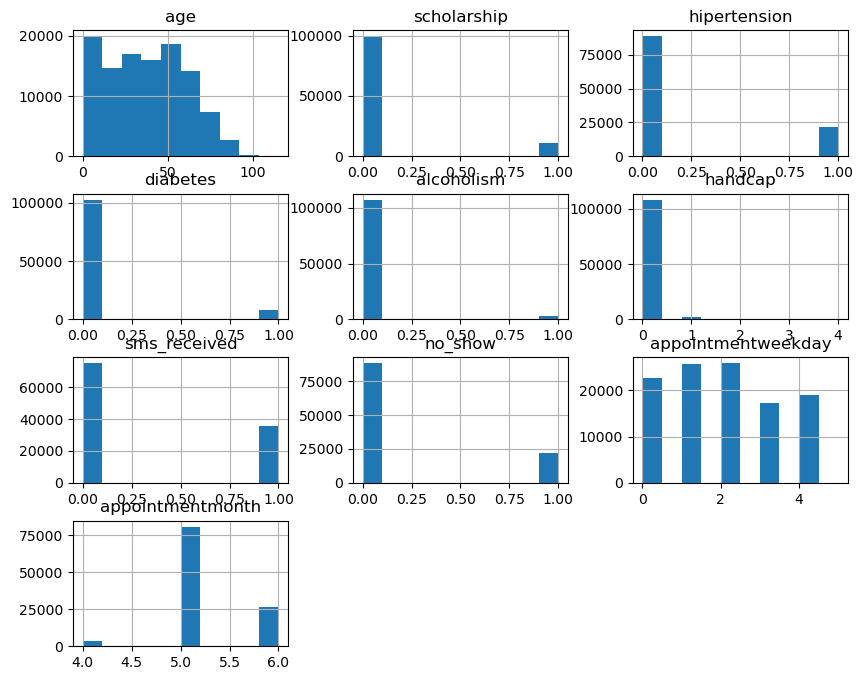

In [33]:
#histogram of characteristics in the dataframe
#https://www.onlinetutorialspoint.com/pandas/pandas-plotting-histogram-from-pandas-dataframes.html
df.hist(figsize=(10,8), bins =10);

In [34]:
df[show].describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointmentweekday,appointmentmonth
count,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.0,88207.000000,88207.000000
mean,37.790504,0.093904,0.204394,0.073838,0.030417,0.022742,0.291337,0.0,1.857460,5.215017
std,23.338645,0.291697,0.403261,0.261508,0.171733,0.162751,0.454381,0.0,1.367287,0.477268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,4.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,5.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,5.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,3.000000,5.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.0,5.000000,6.000000


Statistics can be observed on all columns where patients showed up for appointment

In [35]:
df[noshow].describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointmentweekday,appointmentmonth
count,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.0,22319.000000,22319.000000
mean,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371,1.0,1.861419,5.190376
std,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670,0.496198,0.0,1.388867,0.459201
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,4.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,5.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2.000000,5.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,3.000000,5.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.0,5.000000,6.000000


Statistics can be observed on all columns where patients did not show up for appointment

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (How is patient age related to their chance of showing up for the appointment?)

In [36]:
#age
df.age[show].mean(), df.age[noshow].mean()

(37.790504154999034, 34.31766656212196)

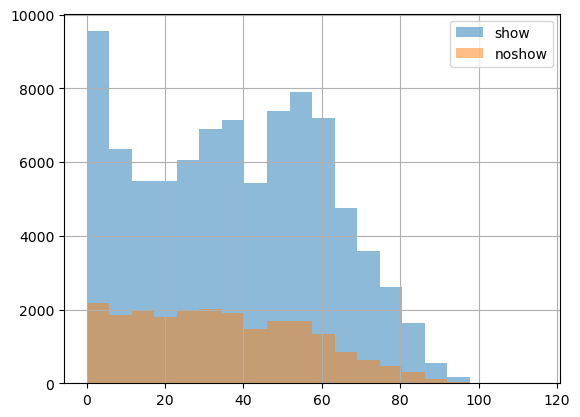

In [37]:
df.age[show].hist(alpha=0.5, bins=20, label='show')
df.age[noshow].hist(alpha=0.5, bins=20, label='noshow')
plt.legend();

In [38]:
df.age.median(), df.query('gender == "M"')['age'].median(),df.query('gender == "F"')['age'].median()

(37.0, 33.0, 39.0)

Median age for overall dataset is 37, while median for male is 33 and female is 39

In [39]:
df[show].age.median(), df.query('gender == "M" and no_show == 0')['age'].median(),df.query('gender == "F" and no_show == 0')['age'].median()

(38.0, 34.0, 40.0)

Median age for patients who show up at appointment is 38, while the same for male is 34 and female is 40

In [40]:
df[noshow].age.median(), df.query('gender == "M" and no_show == 1')['age'].median(),df.query('gender == "F" and no_show == 1')['age'].median()

(33.0, 28.0, 34.0)

In [41]:
#https://stackoverflow.com/questions/57297077/use-variable-in-pandas-query
#function to create a histogram with parameters such as show_noshow, gender, and column to be histographed
def showGenderHist(noshowflag,gendersel,histcol,labelsel):
    #df.query('no_show == @noshowflag and gender == @gendersel')['age'].hist(alpha=0.5, bins=20, label=labelsel)
    df.query('no_show == @noshowflag and gender == @gendersel')[histcol].hist(alpha=0.5, bins=20, label=labelsel)

Median age for patients who don't show up at appointment is 33, while the same for male is 28 and female is 34

The histogram and the median values observed for the general population and also within the gender suggests that the number of appointments where patients don't show up for appointment reduces with age.

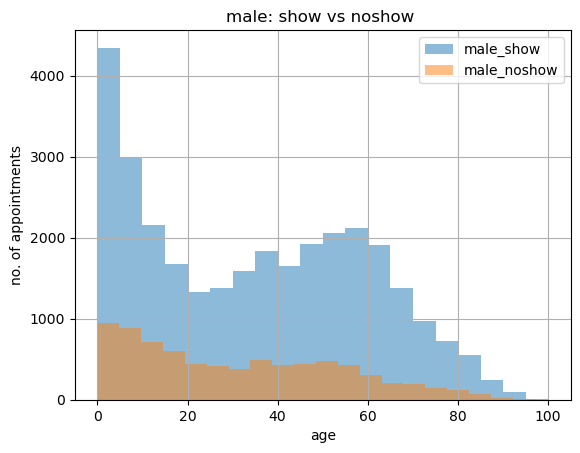

In [42]:
#https://dataplotplus.com/add-title-axis-labels-in-matplotlib/
#function call 
showGenderHist(0,'M','age','male_show')
showGenderHist(1,'M','age','male_noshow')
plt.title('male: show vs noshow ')
plt.xlabel('age')
plt.ylabel('no. of appointments')
plt.legend();

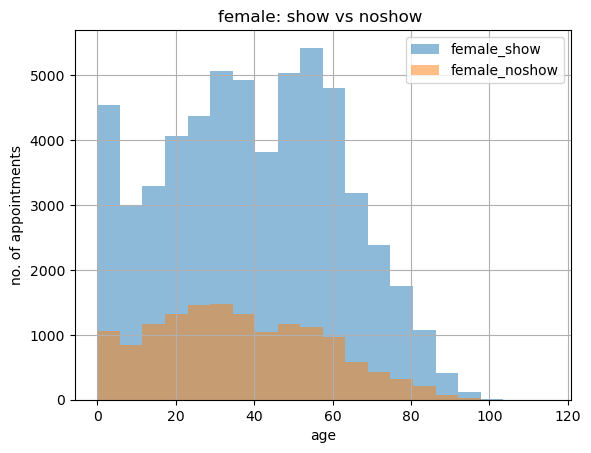

In [43]:
#function call 
showGenderHist(0,'F','age','female_show')
showGenderHist(1,'F','age','female_noshow')
plt.title('female: show vs noshow ')
plt.xlabel('age')
plt.ylabel('no. of appointments')
plt.legend();

From the above histograms of show and noshow data, we can observe that in case of male, the noshow is more right-skewed.

### Research Question 2  (What is the relation between sms received for an appointment to patient actually showing up for the appointment?)

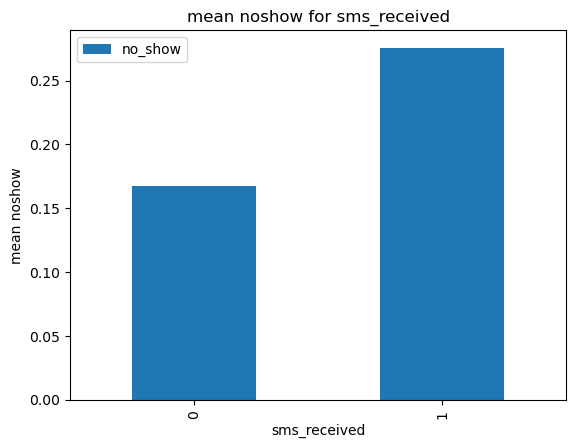

In [44]:
#sms_received
df.groupby(['sms_received']).no_show.mean().plot(kind= 'bar');
plt.title('mean noshow for sms_received')
plt.xlabel('sms_received')
plt.ylabel('mean noshow')
plt.legend();


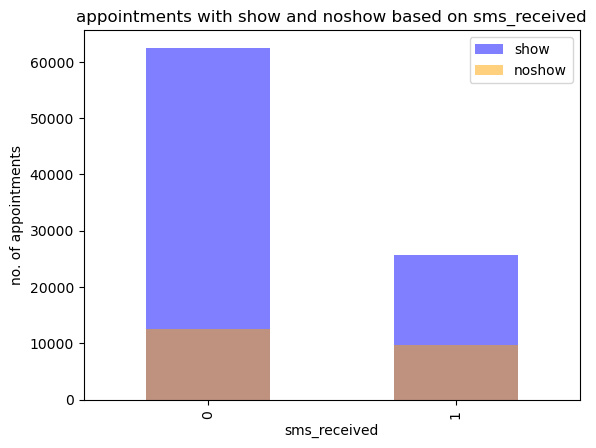

In [46]:
df.sms_received[show].value_counts().plot(kind='bar',alpha = 0.5,color = 'blue',label = 'show')
df.sms_received[noshow].value_counts().plot(kind='bar',alpha = 0.5,color = 'orange',label = 'noshow');
plt.title('appointments with show and noshow based on sms_received')
plt.xlabel('sms_received')
plt.ylabel('no. of appointments')
plt.legend();

Patient has a higher chance of not showing up for an appointment when an sms is received

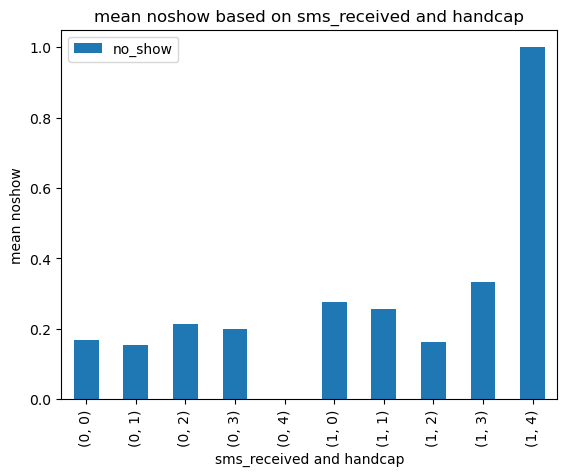

In [47]:

df.groupby(['sms_received','handcap']).no_show.mean().plot(kind= 'bar');
plt.title('mean noshow based on sms_received and handcap')
plt.xlabel('sms_received and handcap')
plt.ylabel('mean noshow')
plt.legend();


Patients that received sms and have 4 disabilities always miss the appointment

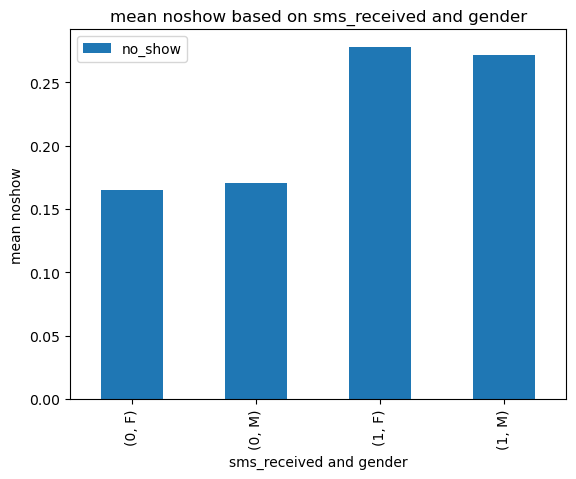

In [48]:
df.groupby(['sms_received','gender']).no_show.mean().plot(kind= 'bar');
plt.title('mean noshow based on sms_received and gender')
plt.xlabel('sms_received and gender')
plt.ylabel('mean noshow')
plt.legend();

Female patients has higher chance of not showing up for an appiontment when sms is received compared to male patients. 


### Research Question 3  (Are patients more likely to not show up for an appointment on a certain weekday?)

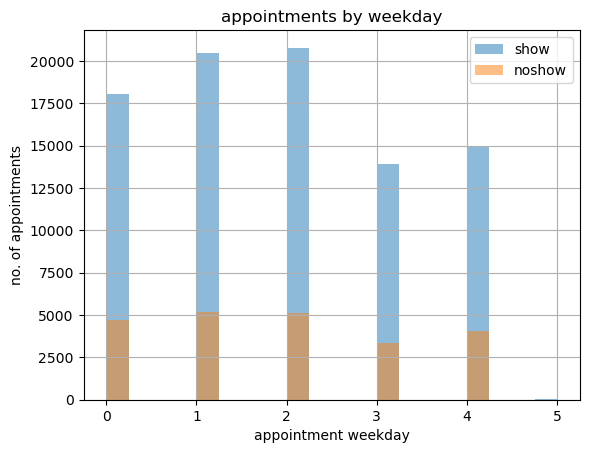

In [49]:
#appointment weekday
df.appointmentweekday[show].hist(alpha=0.5, bins=20, label='show')
df.appointmentweekday[noshow].hist(alpha=0.5, bins=20, label='noshow')
plt.title('appointments by weekday')
plt.xlabel('appointment weekday')
plt.ylabel('no. of appointments')
plt.legend();

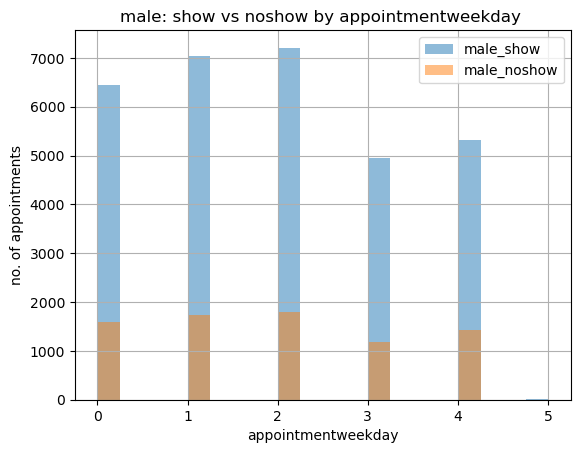

In [50]:
showGenderHist(0,'M','appointmentweekday','male_show')
showGenderHist(1,'M','appointmentweekday','male_noshow')
plt.title('male: show vs noshow by appointmentweekday ')
plt.xlabel('appointmentweekday')
plt.ylabel('no. of appointments')
plt.legend();

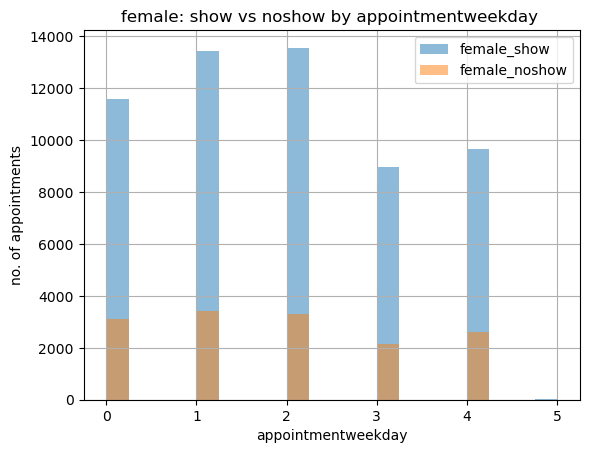

In [51]:
showGenderHist(0,'F','appointmentweekday','female_show')
showGenderHist(1,'F','appointmentweekday','female_noshow')
plt.title('female: show vs noshow by appointmentweekday ')
plt.xlabel('appointmentweekday')
plt.ylabel('no. of appointments')
plt.legend();

There is no difference observed on appointment weekday by gender

In [52]:
#replaced the values in handcap with 1 or more disabilities to  1 for observing it based on whether a patient is handicapped or not
df['handcap'].replace({2:1,3:1,4:1}, inplace = True)
df.head(2)

,gender,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointmentweekday,appointmentmonth
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,4,4
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,4,4


Patients with 1 or more disabilites have been defaulted to 1 for performing analysis based on whether a patient has disability

In [53]:
#to check the number of appointments whether the patient has any disability
df['handcap'].value_counts()

0    108285
1      2241
Name: handcap, dtype: int64

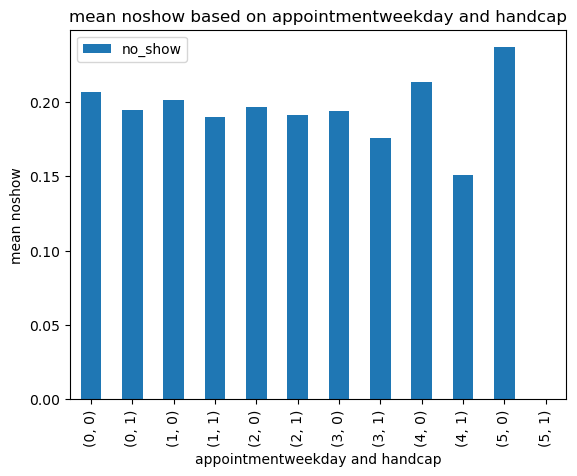

In [99]:
df.groupby(['appointmentweekday','handcap']).no_show.mean().plot(kind= 'bar');
plt.title('mean noshow based on appointmentweekday and handcap')
plt.xlabel('appointmentweekday and handcap')
plt.ylabel('mean noshow')
plt.legend();

Patients that have 0 disabilities are much likely to not show up for an appointment on every weekday compared to patients with disabilities.

<a id='conclusions'></a>
## Conclusions

>Number of appointments where patients do not show up for appointment reduces with age. The same was observed across both genders. The noshow data on male is more skewed to the right. 

>Patients have a higher chance of not showing up for appointment when an sms is received. Patients that received an sms and have 4 disabilities always missed the appointment. It was also observed that female patients that received an sms have higher chances of not showing up for appointment compared to male patients

>Appointment weekday does not have a real impact on patient not showing up for appointment. It was observed that patients with no disabilities at all have a higher chance of not showing up for an appointment on all weekdays.



<a id='limitations'></a>
## Limitations

>The dataset does not have the same number of appointments for both genders. 

>Although patient with 4 disabilities and that received an sms always missed an appointment, but it represents only 1 record in over 100,000 records. For this reason the data in column handcap has been changed to whether or not a patient has a disability. 

>Some of the observations are not large enough to make a recommendation.
